# Explore here

In [1]:
# Your code here
# Your code here
import os
import shutil
import random

lista_fotografias = os.listdir('../data/raw/train')

for fotografia in lista_fotografias:
    if not fotografia.endswith('.jpg'):
        continue
    if 'cat' in fotografia:
        #2 de cada 10 veces mover el archivo a processed/test/cat y 8 de cada 10 veces a processed/train/cat
        if random.random() < 0.2:
            destino = '../data/processed/test/cat'
        else:
            destino = '../data/processed/train/cat'
        shutil.move(os.path.join('../data/raw/train', fotografia), destino)
    elif 'dog' in fotografia:
        if random.random() < 0.2:
            destino = '../data/processed/test/dog'
        else:
            destino = '../data/processed/train/dog'
        shutil.move(os.path.join('../data/raw/train', fotografia), destino)
    else:
        print(f'Animal desconocido: {fotografia}')








In [2]:
#cambiar de tamaño las imagenes para que todas sean de 200x200
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img

def resize_images(directory, size=(200, 200)):
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(directory, filename)# esto une la la carpeta con el nombre del archivo, pero es la forma mas rapida de recorrer todos los archivos de la carpeta
            img = load_img(img_path, target_size=size)
            img_array = img_to_array(img)
            save_img(img_path, img_array)

resize_images('../data/processed/train/cat')
resize_images('../data/processed/train/dog')
resize_images('../data/processed/test/cat')
resize_images('../data/processed/test/dog')

ModuleNotFoundError: No module named 'tensorflow'

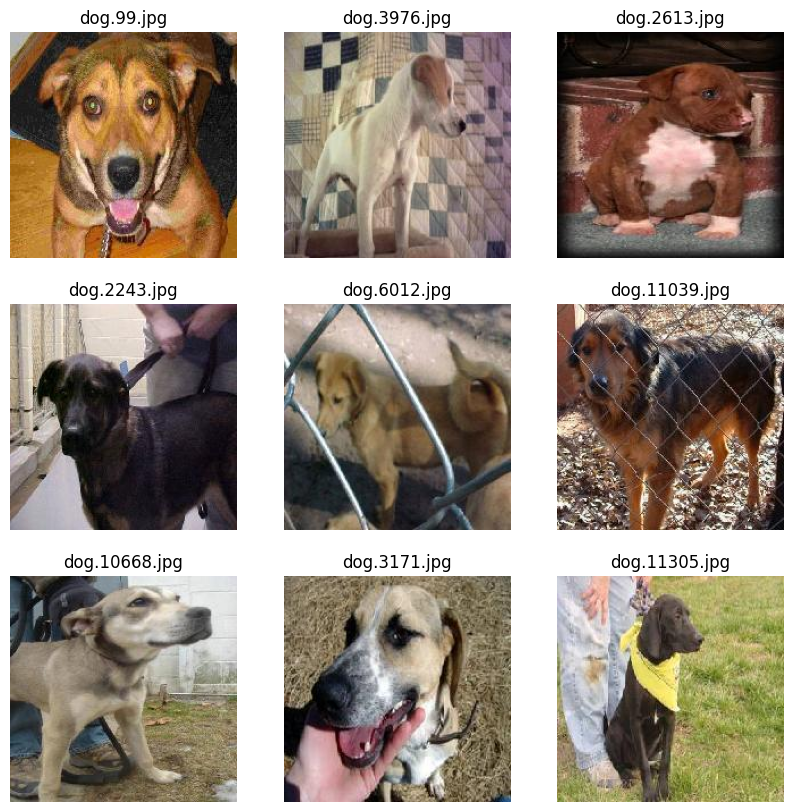

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(9):
    img_path = random.choice(os.listdir('../data/processed/train/dog'))
    img = load_img(os.path.join('../data/processed/train/dog', img_path))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(img_path.split('/')[-1])
    plt.axis('off')




In [ ]:
for subdir in ["cat","dog"]:
    print(os.path.join("../data/raw/test", subdir))

../data/raw/test\cat
../data/raw/test\dog


In [ ]:
#mover los archivos de la  carpeta test desde las subcarpetas dog y cat a la carpeta test
for subdir in ['cat', 'dog']:
    subdir_path = os.path.join('../data/processed/test', subdir)#crea la ruta de las subcarpetas, a las cuales se les va a sacar los archivos
    for filename in os.listdir(subdir_path):#genera el nombre de lor archivos dentro de las subcarpetas dog y cat de train
        if filename.endswith('.jpg'):
            src_path = os.path.join(subdir_path, filename)#genera la ruta del archivo que se va a mover 
            dest_path = os.path.join('../data/processed/test', filename)#genera la ruta de destino para el archivo
            shutil.move(src_path, dest_path)#mueve las imagenes de las subcarpetas a la carpeta de test


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir="../data/processed/train" 
test_dir="../data/processed"
datagentrainer = ImageDataGenerator()
datagentest = ImageDataGenerator()
train_data = datagentrainer.flow_from_directory(
    train_dir,
    target_size=(200,200),
    batch_size=32,
    class_mode=["cat", "dog"],
)
test_data=datagentest.flow_from_directory(
    train_dir,
    target_size=(200,200),
    batch_size=32,
    class_mode=["test"],
)




In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '../data/processed/train'
test_dir = '../data/processed/'

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

train_data = datagentrain.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              classes=['cat', 'dog']
)
test_data = datagentest.flow_from_directory(test_dir,
                                            target_size=(200, 200),
                                            batch_size=32,
                                            classes=['test']
)

Found 20003 images belonging to 2 classes.
Found 4997 images belonging to 1 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Rescaling

model = Sequential()
model.add(Rescaling(1./255, input_shape=(200, 200, 3)))
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))




c:\Users\rorrito\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\rorrito\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(train_data,epochs=1)
#mientras mas epocas se hagan mas fiable sera el moedelo.

  1/626 ━━━━━━━━━━━━━━━━━━━━ 1:18:29 8s/step - accuracy: 0.5312 - loss: 0.6929

KeyboardInterrupt: 